Lab Session 4

1) Processing
Inmport the folowing dataset :

https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/airline-safety.csv')
display(df.head())
data = df[['incidents_00_14', 'fatal_accidents_00_14']].to_numpy()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


You can use the following code to plot the data :

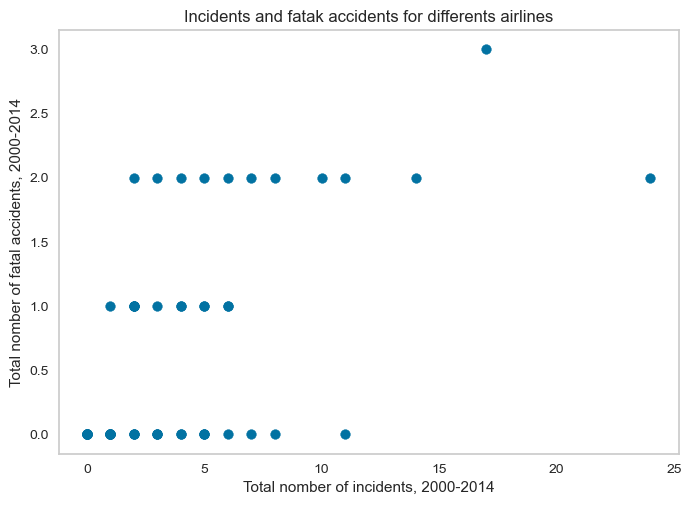

In [60]:
def plot_data(data):
    fig, ax = plt.subplots(1,1)
    plt.grid()
    plt.scatter(data[:,0], data[:,1])
    ax.set_xlabel('Total nomber of incidents, 2000-2014')
    ax.set_ylabel('Total nomber of fatal accidents, 2000-2014')
    ax.set_title('Incidents and fatak accidents for differents airlines')
    plt.show()

plot_data(data)

Exercise :
Using the sklearn documentation,
1) Apply a standard scaling to the dataset. If you visualize the data, all the plot seams to be at the same place but if you look at the axis, you will see that they are scaled according.
>Normaliser les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
Le score standard d'un échantillon x est calculé comme suit :
z = (x - u) / s
où u est la moyenne des échantillons d'apprentissage ou zéro si with_mean=False, et s est l'écart-type des échantillons d'apprentissage ou un si with_std=False.
Le centrage et la mise à l'échelle s'effectuent indépendamment pour chaque caractéristique en calculant les statistiques pertinentes sur les échantillons de l'ensemble d'apprentissage. La moyenne et l'écart-type sont ensuite stockés pour être utilisés sur des données ultérieures à l'aide de la transformation.
La normalisation d'un ensemble de données est une exigence commune à de nombreux estimateurs d'apprentissage automatique : ils risquent de mal se comporter si les caractéristiques individuelles ne ressemblent pas plus ou moins à des données normalement distribuées (par exemple, gaussiennes avec une moyenne de 0 et une variance unitaire).
Par exemple, de nombreux éléments utilisés dans la fonction objective d'un algorithme d'apprentissage (comme le noyau RBF des machines à vecteurs de support ou les régularisateurs L1 et L2 des modèles linéaires) supposent que toutes les caractéristiques sont centrées autour de 0 et ont une variance du même ordre. Si une caractéristique a une variance supérieure de plusieurs ordres de grandeur à celle des autres, elle peut dominer la fonction objective et empêcher l'estimateur d'apprendre correctement à partir d'autres caractéristiques, comme prévu.
Ce scaler peut également être appliqué à des matrices CSR ou CSC peu denses en passant with_mean=False pour éviter de briser la structure peu dense des données.

2) Apply a robust scaling to the dataset.
>Mettre à l'échelle des caractéristiques en utilisant des statistiques qui sont robustes aux valeurs aberrantes.
Cet écailleur supprime la médiane et met à l'échelle les données en fonction de l'intervalle de quantile (la valeur par défaut est IQR : Interquartile Range). L'IQR est l'intervalle entre le 1er quartile (25e quantile) et le 3e quartile (75e quantile).
Le centrage et la mise à l'échelle s'effectuent indépendamment sur chaque caractéristique en calculant les statistiques pertinentes sur les échantillons de l'ensemble d'apprentissage. La médiane et l'intervalle interquartile sont ensuite stockés pour être utilisés sur des données ultérieures à l'aide de la méthode de transformation.
La normalisation d'un ensemble de données est une exigence commune à de nombreux estimateurs d'apprentissage automatique. En règle générale, cette normalisation s'effectue en supprimant la moyenne et en mettant à l'échelle la variance unitaire. Cependant, les valeurs aberrantes peuvent souvent influencer la moyenne/variance de l'échantillon de manière négative. Dans ce cas, la médiane et l'intervalle interquartile donnent souvent de meilleurs résultats.

3) Apply a min-max scaling to the dataset.
>Transformer les caractéristiques en mettant à l'échelle chaque caractéristique dans un intervalle donné.
Cet estimateur met à l'échelle et traduit chaque caractéristique individuellement de manière à ce qu'elle se situe dans l'intervalle donné sur l'ensemble d'apprentissage, par exemple entre zéro et un.
Cette transformation est souvent utilisée comme alternative à la mise à l'échelle de la moyenne zéro et de la variance unitaire.

4) Normalize the dataset.
>Mettre à l'échelle les vecteurs d'entrée individuellement à la norme unitaire (longueur du vecteur).

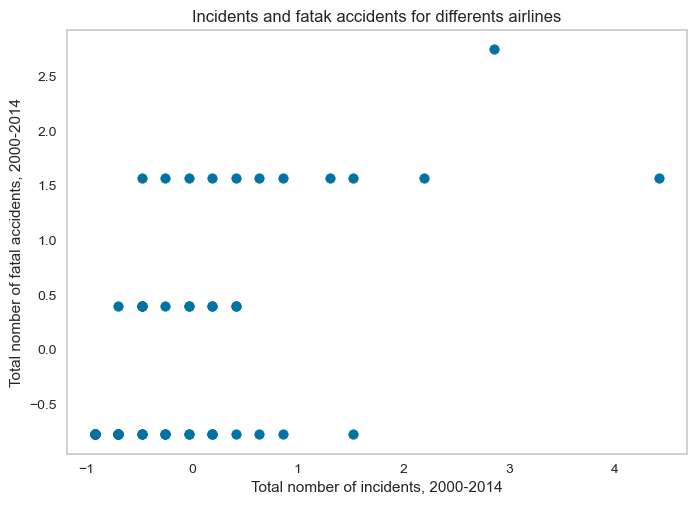

In [61]:
# 1) Standard scaling
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
data_scaled_standard = scaler_standard.fit_transform(data)
plot_data(data_scaled_standard)

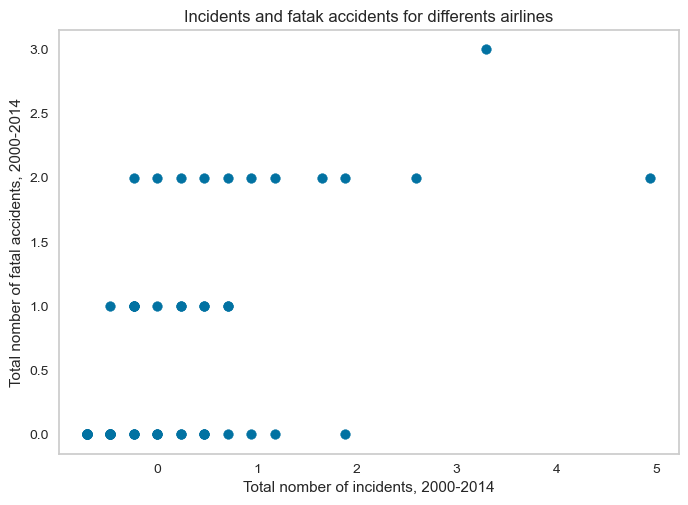

In [62]:
# 2) Robust scaling

from sklearn.preprocessing import RobustScaler
scaler_robust = RobustScaler()
data_scaled_robust = scaler_robust.fit_transform(data)
plot_data(data_scaled_robust)

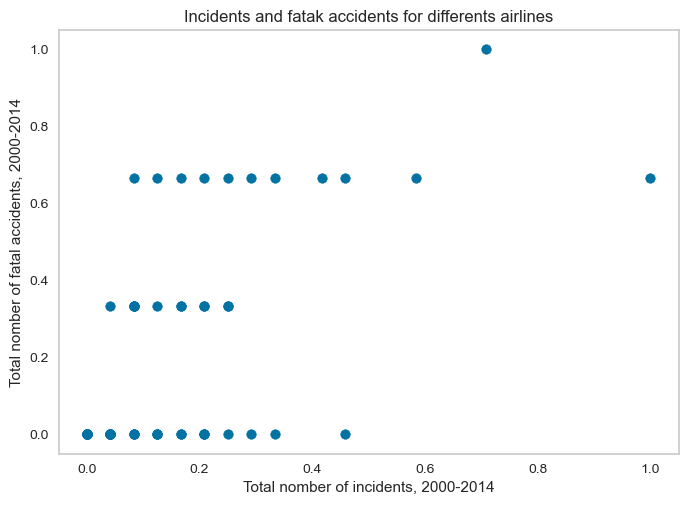

In [63]:
# 3) Min-max scaling

from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
data_scaled_minmax = scaler_minmax.fit_transform(data)
plot_data(data_scaled_minmax)

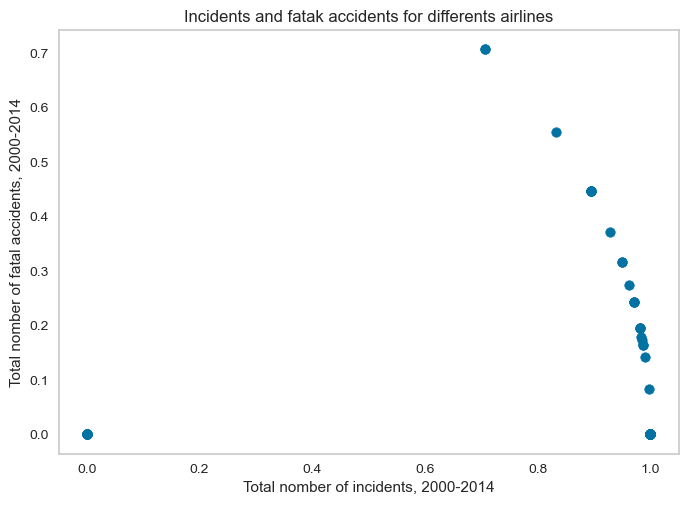

In [64]:
# 4) Normalize

from sklearn.preprocessing import Normalizer
scaler_normalize = Normalizer()
data_scaled_normalize = scaler_normalize.fit_transform(data)
plot_data(data_scaled_normalize)

2) Principl Component Analysis (PCA)

In this tutorial we will use Sklearn breast cancer dataset. First, we import the essential librairies, load the dataset and separate features from targets.

In [65]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

breastCancer = load_breast_cancer()

X = breastCancer.data
y = breastCancer.target

Then we standardize features by applying a standard scaling to the dataset. The goal here, i to normally redistribute the features over the origin.

In [66]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

Now, we project the breast cancer dataset into a two-dimensional principal components, the n_components variable represent the targeted dimension which we project our dataset.

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_breastCancer = pca.fit_transform(X)

Next, we create a Dataframe gathering PCA1, PCA2 and the labels of the targets, which will be replaced with their string respective to ease data visualisation.

In [68]:
breastCancerDf = pd.DataFrame(data = pca_breastCancer, columns = ['principal component 1', 'principal component 2'])

breastCancerDf['label'] = breastCancer.target.tolist()
breastCancerDf['label'].replace(0, 'benign', inplace=True)
breastCancerDf['label'].replace(1, 'malignant', inplace=True)

breastCancerDf

,principal component 1,principal component 2,label
0,9.192837,1.948583,benign
1,2.387802,-3.768172,benign
2,5.733896,-1.075174,benign
3,7.122953,10.275589,benign
4,3.935302,-1.948072,benign
...,...,...,...
564,6.439315,-3.576817,benign
565,3.793382,-3.584048,benign
566,1.256179,-1.902297,benign
567,10.374794,1.672010,benign


Finally, we plot the data.

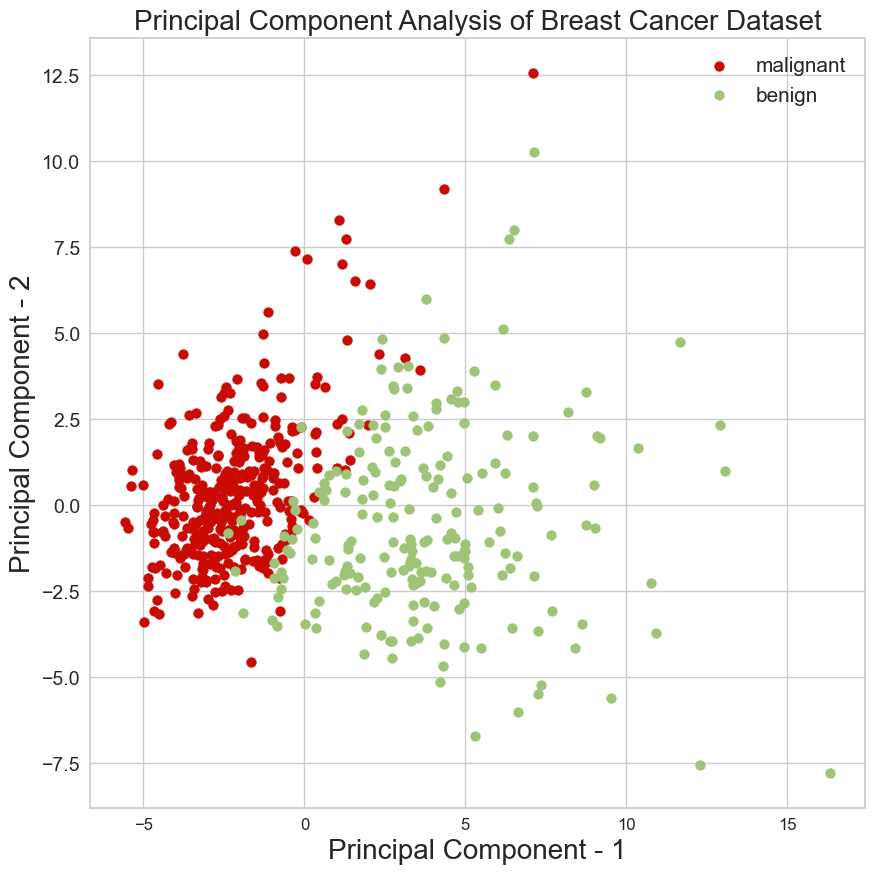

In [69]:
plt.figure(figsize = (10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize = 20)
plt.ylabel('Principal Component - 2', fontsize = 20)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=20)
targets = breastCancer.target_names
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breastCancerDf['label'] == target
    plt.scatter(breastCancerDf.loc[indicesToKeep, 'principal component 1']
               , breastCancerDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

We can observe that the two classes can be linearly separable when projected to a two-dimensional space.

Exercice 1

Water potability is determined from various parameters such as ph, conductivity and chloramines. The following dataset contains records of portability test by analysing 9 parameters. Link : https://www.kaggle.com/datasets/adityakadiwal/water-potability

Are these parameters reliable to determine whether the water is potable or not ?

([<matplotlib.patches.Wedge at 0x2907d5820>,
 [Text(-0.3722543665175176, 1.0350974285586076, '0'),
  Text(0.3722543665175174, -1.0350974285586076, '1')],
 [Text(-0.2030478362822823, 0.5645985973956041, '61.0%\n1998'),
  Text(0.2030478362822822, -0.5645985973956041, '39.0%\n1278')])

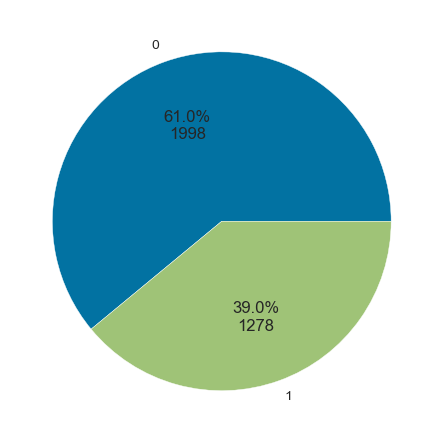

In [70]:
## Find how maney samples of water are portable
import seaborn as sns
WaterQuality_df = pd.read_csv('./datasets/water_potability.csv')

total = WaterQuality_df['Potability'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(WaterQuality_df['Potability'].value_counts().values, labels=WaterQuality_df['Potability'].value_counts().index, autopct=fmt)

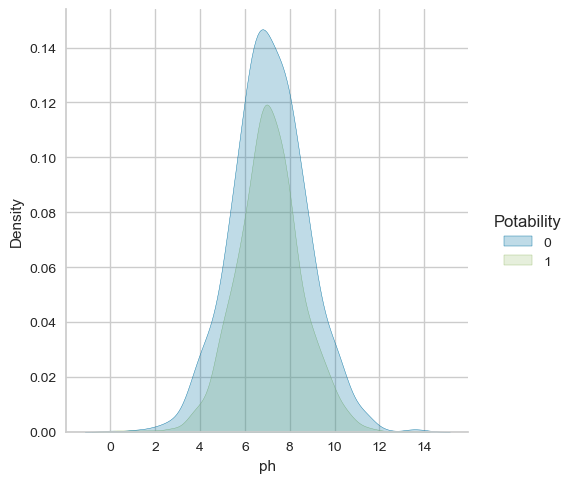

In [71]:
sns.displot(WaterQuality_df, x="ph", hue="Potability", kind="kde", fill=True)

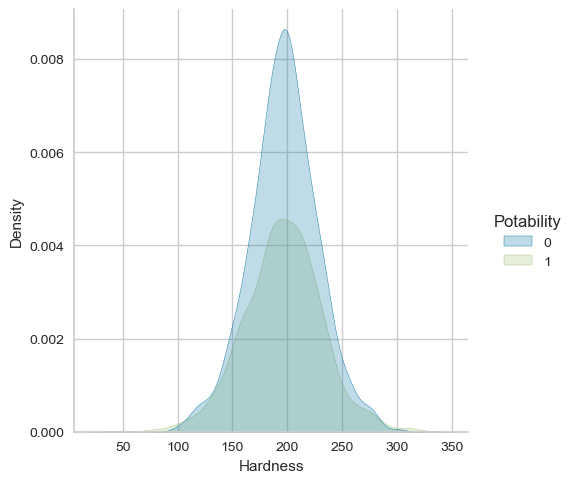

In [72]:
sns.displot(WaterQuality_df, x="Hardness", hue="Potability", kind="kde", fill=True)

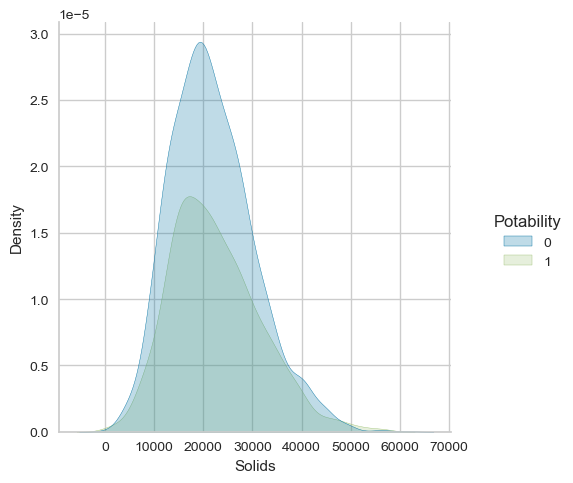

In [73]:
sns.displot(WaterQuality_df, x="Solids", hue="Potability", kind="kde", fill=True)

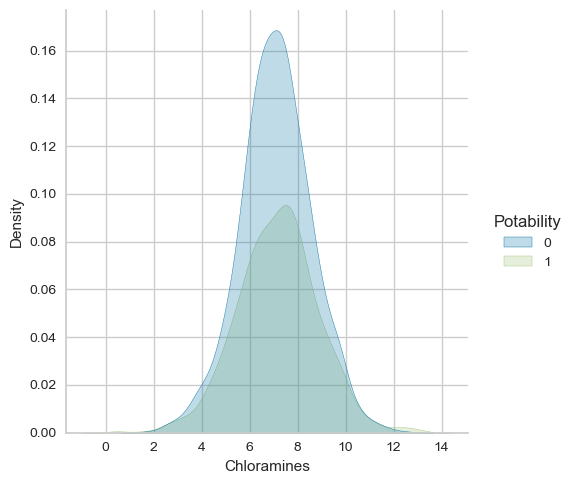

In [74]:
sns.displot(WaterQuality_df, x="Chloramines", hue="Potability", kind="kde", fill=True)

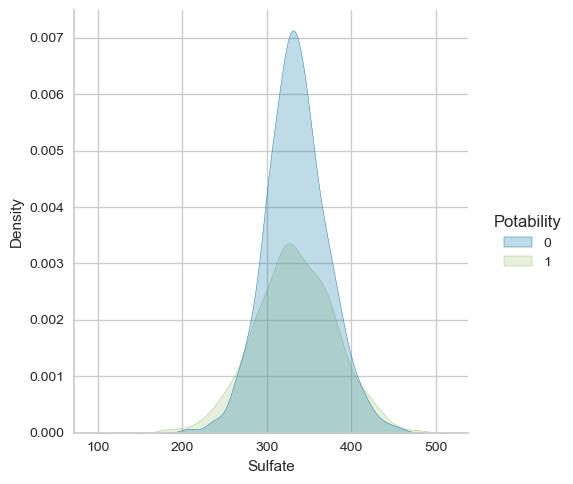

In [75]:
sns.displot(WaterQuality_df, x="Sulfate", hue="Potability", kind="kde", fill=True)

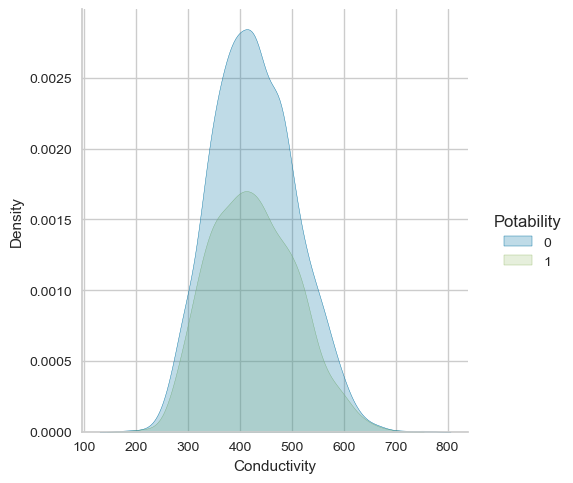

In [76]:
sns.displot(WaterQuality_df, x="Conductivity", hue="Potability", kind="kde", fill=True)

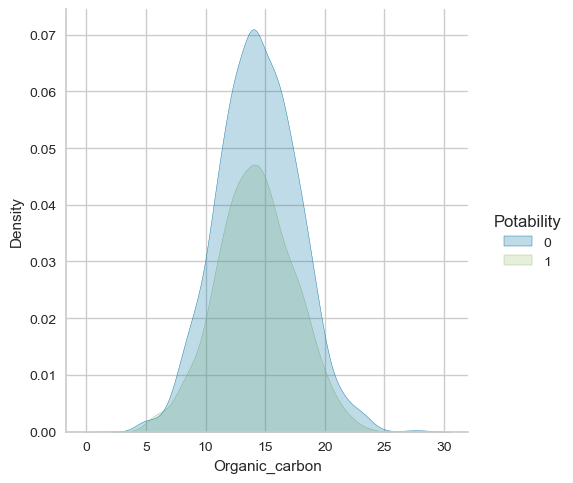

In [77]:
sns.displot(WaterQuality_df, x="Organic_carbon", hue="Potability", kind="kde", fill=True)

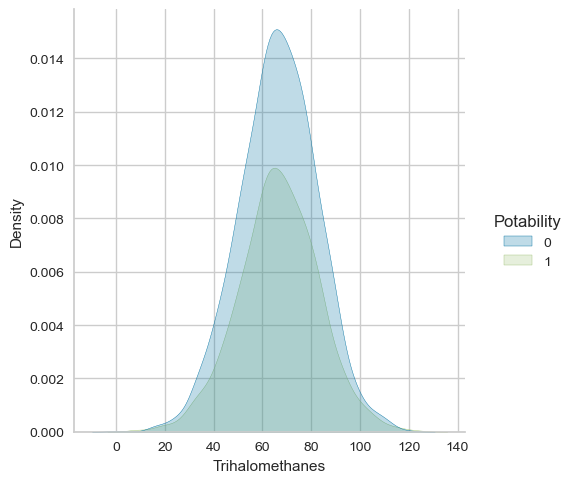

In [78]:
sns.displot(WaterQuality_df, x="Trihalomethanes", hue="Potability", kind="kde", fill=True)

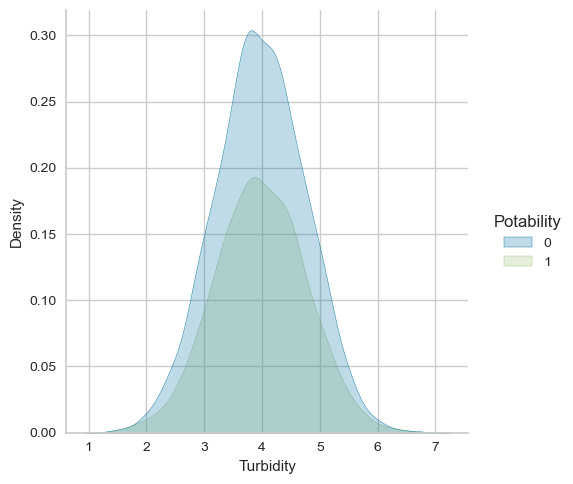

In [79]:
sns.displot(WaterQuality_df, x="Turbidity", hue="Potability", kind="kde", fill=True)

In [80]:
#assigning values to features as X and target as y

X = WaterQuality_df.drop(["Potability"],axis=1)

y = WaterQuality_df["Potability"]

#Set up a standard scaler for the features
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,1.492522e-16,1.000180,-4.442062,-0.619625,-0.027630,0.615590,4.340691
Hardness,3276.0,1.018314e-15,1.000153,-4.530454,-0.593737,0.018194,0.617433,3.855680
Solids,3276.0,-5.476558e-17,1.000153,-2.474344,-0.723992,-0.123900,0.606653,4.472689
Chloramines,3276.0,5.162063e-16,1.000153,-4.277288,-0.628525,0.005068,0.627106,3.793631
Sulfate,2495.0,-4.784416e-16,1.000200,-4.945255,-0.629732,-0.016959,0.632101,3.556147
Conductivity,3276.0,1.350161e-16,1.000153,-3.028290,-0.748291,-0.053459,0.687860,4.048144
Organic_carbon,3276.0,2.711167e-17,1.000153,-3.653635,-0.670919,-0.020145,0.687097,4.237147
Trihalomethanes,3114.0,1.597238e-16,1.000161,-4.059895,-0.652454,0.013986,0.676534,3.561850
Turbidity,3276.0,5.183752e-16,1.000153,-3.225560,-0.675510,-0.015070,0.683787,3.552921


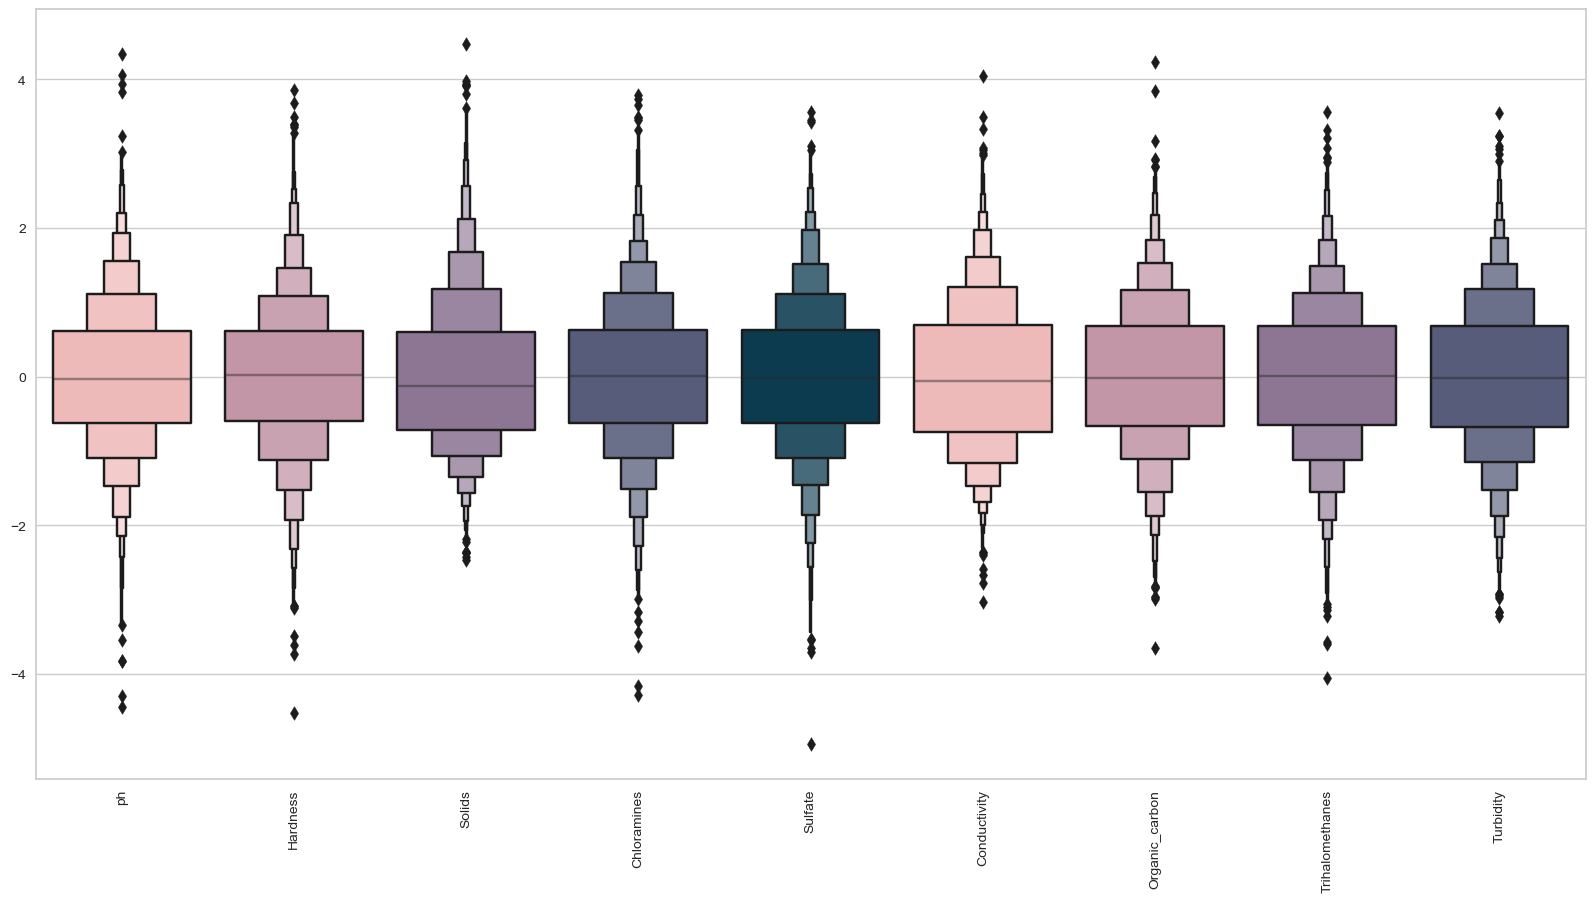

In [81]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

These parameters are not reliable because everything overlaps.

3. K-Means Clustering

In this tuturial we will identify different clusters of random blods.

In [82]:
%matplotlib inline
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Let's create 6 distinct blobs of data.

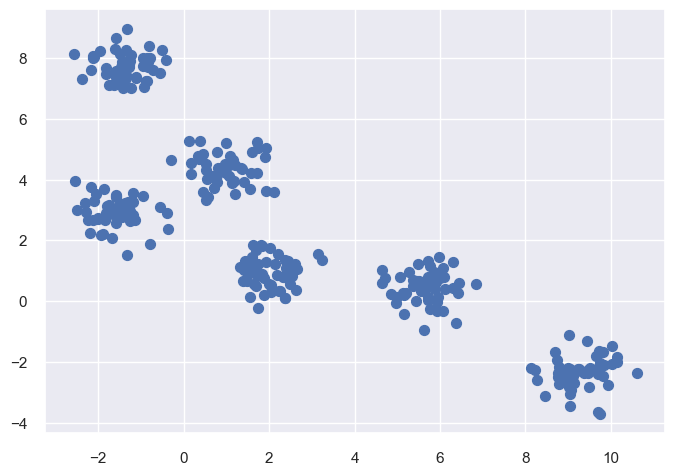

In [83]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=6,
                       cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

These clusters can be easily identified by eye. However, it is tricky to determine them automatically. We suppose that we want 6 clusters.

In [84]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Our 6 clusters are visualized as follows.

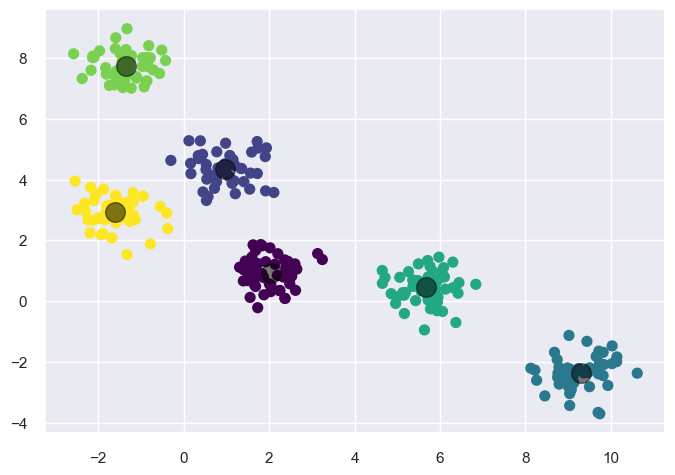

In [85]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

In the majority of the case, it is hard to predict the number of the cluster. However, we can determine the number of cluster using the elbow method.

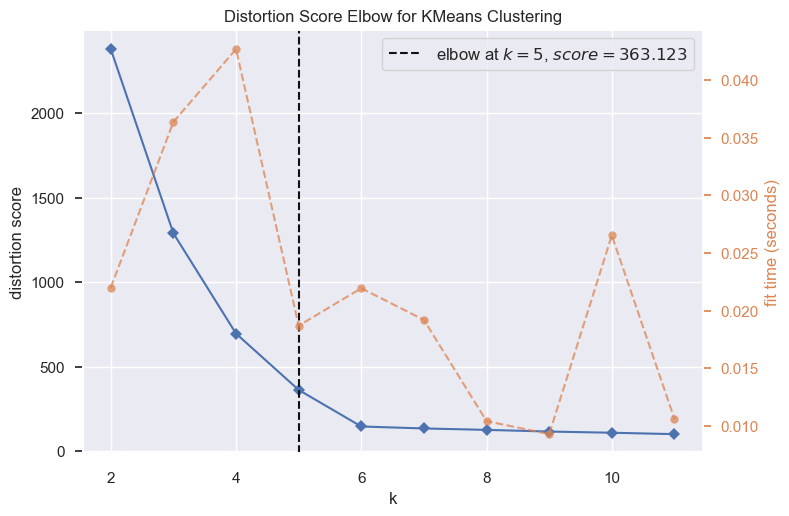

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Exercice 1

Using K-means clustering, divide and display each subset of the digits' dataset. Where do we have confusion ?

Digit dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

(1797, 64)


<Figure size 800x550 with 0 Axes>

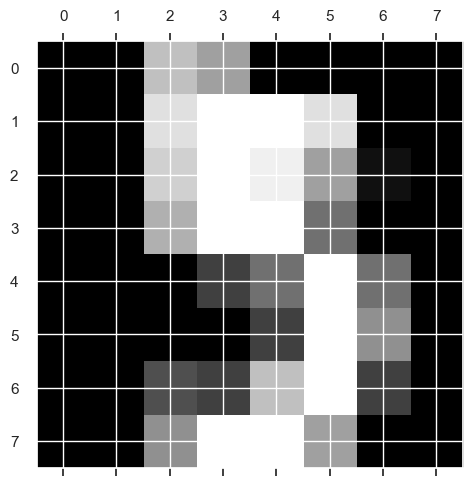

In [87]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

plt.gray()
plt.matshow(digits.images[5])

plt.show()

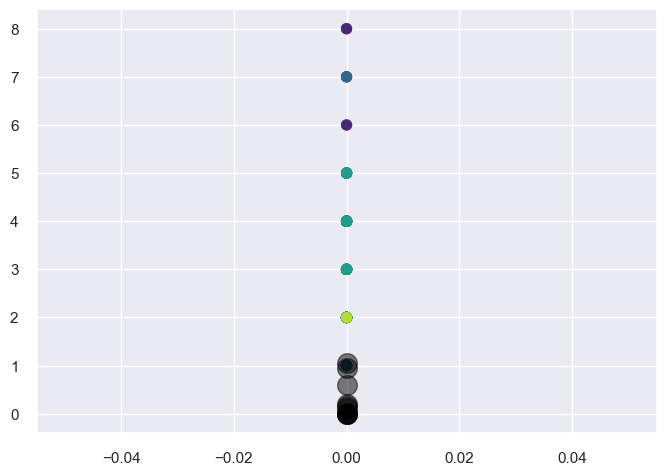

In [88]:
kmeansDigit = KMeans(n_clusters=10)
kmeansDigit.fit(digits.data)
y_kmeansDigit = kmeansDigit.predict(digits.data)

plt.scatter(digits.data[:, 0], digits.data[:, 1], c=y_kmeansDigit, s=50, cmap='viridis')

centers = kmeansDigit.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

Confusion entre 0 et 1 ???

4. Gaussian Model

Start by importing dataset : https://raw.githubusercontent.com/BBUCHI/DS54/main/Clustering_gmm.csv

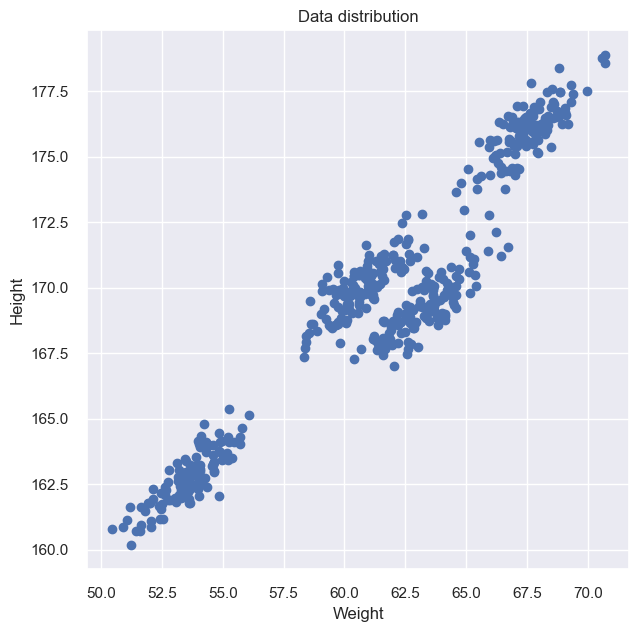

In [89]:
df_clustering = pd.read_csv('./datasets/Clustering_gmm.csv')

df_clustering.head()

plt.figure(figsize=(7,7))
plt.scatter(df_clustering['Weight'], df_clustering['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data distribution')
plt.show()

Exercise :
1) With the help of the sklearn documentation for GaussianMixture, fit a gaussian mixture model to the dataset.
2) Display the dataset once fitted.

[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 

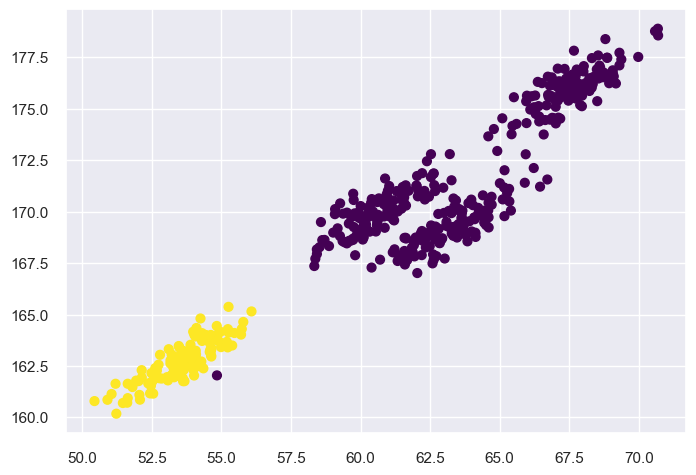

In [90]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(df_clustering)
labels = gm.predict(df_clustering)
print(labels)

print(gm.score(df_clustering))

plt.scatter(df_clustering['Weight'], df_clustering['Height'], c=labels, s=40, cmap='viridis');